## Data reading and imports

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('pre-owned cars.csv')
print(df.head())
print(df.info())

      brand                                     model transmission  make_year  \
0  Mahindra              Thar LX D 4WD MT CONVERTIBLE       Manual     2020.0   
1   Hyundai                         Verna 1.6 VTVT SX       Manual     2018.0   
2      Tata  Harrier XT PLUS 2.0L KRYOTEC DARK EDITON       Manual     2022.0   
3     Honda                     City 1.5L I-VTE V CVT    Automatic     2023.0   
4      Ford             Ecosport TITANIUM 1.5L DIESEL       Manual     2021.0   

     reg_year fuel_type  engine_capacity(CC)  km_driven  ownership    price  \
0  01-01-2021    Diesel               2184.0    11003.0  1st owner  1231000   
1  01-07-2018    Petrol               1591.0    66936.0  1st owner   786000   
2  01-08-2022    Diesel               1956.0    27990.0  1st owner  1489000   
3  01-04-2023    Petrol               1498.0     5061.0  1st owner  1227000   
4  01-07-2021    Diesel               1498.0    23480.0  1st owner   887000   

   overall_cost has_insurance spare_ke

## Data Cleaning and Preprocessing

In [ ]:
print(df.isnull().sum())

df['engine_capacity(CC)'] = df['engine_capacity(CC)'].fillna(df['engine_capacity(CC)'].median())

df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

df['make_year'] = pd.to_datetime(df['make_year'], format='%Y', errors='coerce')
df['reg_year'] = pd.to_datetime(df['reg_year'], format='%d-%m-%Y', errors='coerce')

print(df.dtypes)

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2086
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64
brand                          object
model                          object
transmission                   object
make_year              datetime64[ns]
reg_year               datetime64[ns]
fuel_type                      object
engine_capacity(CC)           float64
km_driven                     float64
ownership                      object
price                           int64
overall_cost                  float64
has_insurance                  object
spare_key                      object
reg_number                     object
title                          obje

## Exploratory Data Analysis

                           make_year             reg_year  \
count                           2805                  720   
mean   2018-03-08 01:16:29.518716416  2019-02-16 09:06:00   
min              2010-01-01 00:00:00  2011-01-01 00:00:00   
25%              2016-01-01 00:00:00  2017-05-01 00:00:00   
50%              2018-01-01 00:00:00  2019-08-16 12:00:00   
75%              2021-01-01 00:00:00  2021-07-01 00:00:00   
max              2024-01-01 00:00:00  2024-04-01 00:00:00   
std                              NaN                  NaN   

       engine_capacity(CC)      km_driven         price  overall_cost  
count          2806.000000    2805.000000  2.806000e+03   2805.000000  
mean           1256.419102   49215.477362  1.342522e+06  13495.022816  
min             624.000000     450.000000  1.630000e+05   4039.000000  
25%            1197.000000   28540.000000  4.350000e+05   9267.000000  
50%            1197.000000   45695.000000  5.940000e+05  12145.000000  
75%            145

C:\Users\leo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


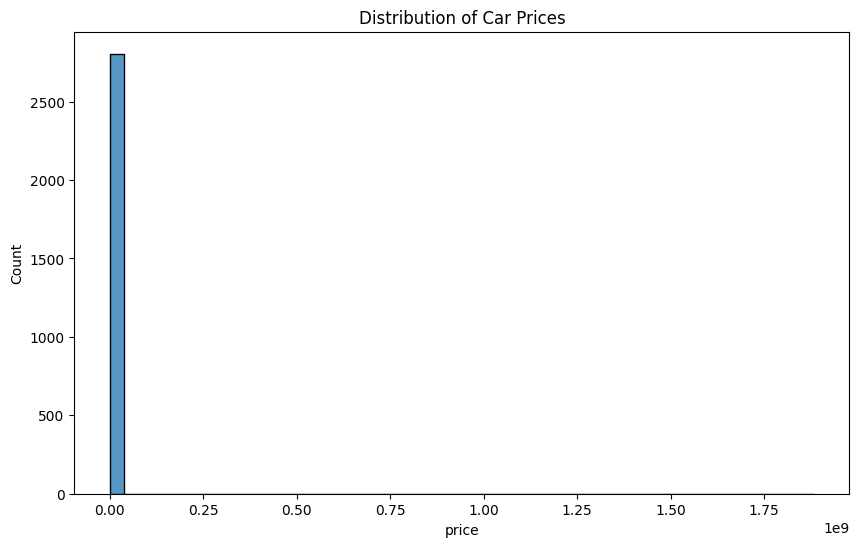

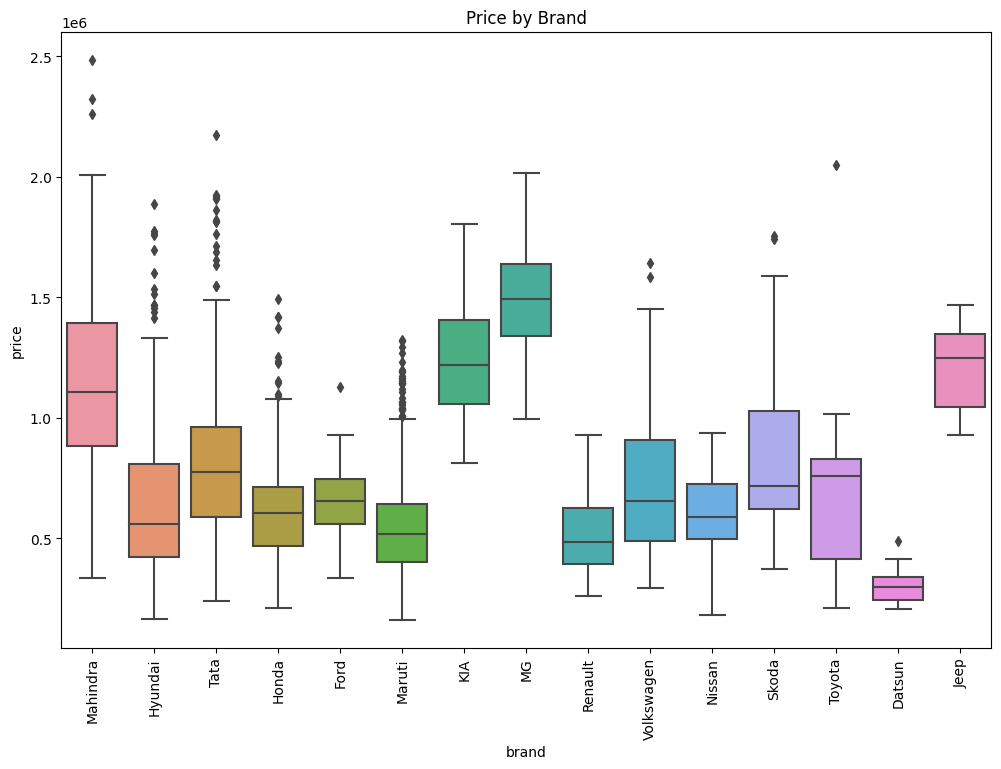

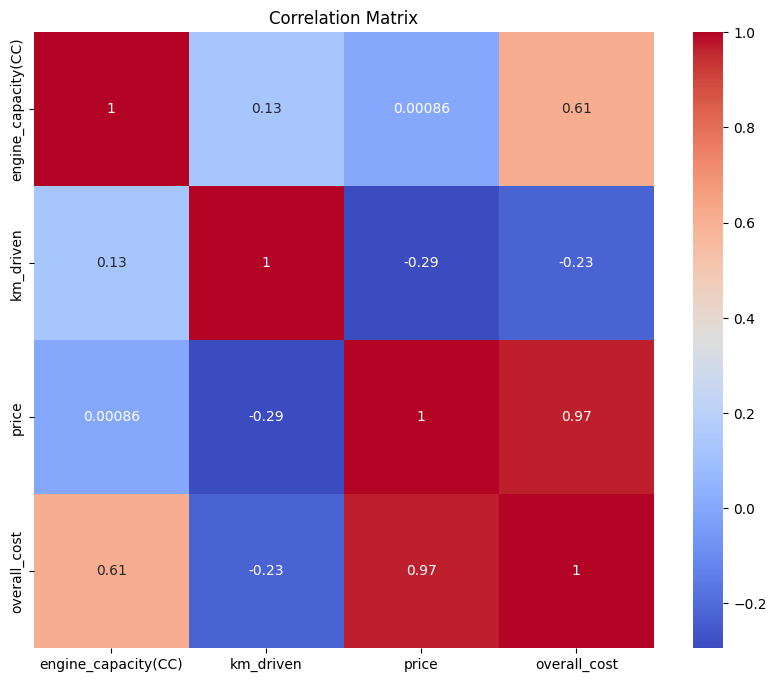

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Car Prices')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price by Brand')
plt.show()

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning Model for Price Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

le_brand = LabelEncoder()
df['brand_encoded'] = le_brand.fit_transform(df['brand'])

le_fuel = LabelEncoder()
df['fuel_encoded'] = le_fuel.fit_transform(df['fuel_type'])

le_trans = LabelEncoder()
df['trans_encoded'] = le_trans.fit_transform(df['transmission'])

features = ['brand_encoded', 'fuel_encoded', 'trans_encoded', 'engine_capacity(CC)', 'km_driven', 'make_year']
X = df[features].copy()
X['make_year'] = X['make_year'].dt.year
y = df['price']

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, R2: {r2}')

MAE: 81906.7971530249, R2: 0.8715240649320724


## JSON File Manipulation

In [ ]:
import json

predictions = {'actual': y_test.tolist(), 'predicted': y_pred.tolist()}
with open('predictions.json', 'w') as f:
    json.dump(predictions, f)

with open('predictions.json', 'r') as f:
    data = json.load(f)
print("Sample predictions loaded from JSON:")
print(data['actual'][:5])
print(data['predicted'][:5])

Sample predictions loaded from JSON:
[603000, 728000, 902000, 722000, 617000]
[608530.0, 637820.0, 759320.0, 743670.0, 707630.0]


## Web Scraping

In [ ]:
%pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.carwale.com/used/cars-for-sale/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

cars = []
for item in soup.find_all('div', class_='car-item'):
    name = item.find('h3').text.strip()
    price = item.find('span', class_='price').text.strip()
    cars.append({'name': name, 'price': price})

print("Scraped cars:", cars[:5])

with open('scraped_cars.json', 'w') as f:
    json.dump(cars, f)

Scraped cars: []


## Multithreading

In [ ]:
import threading
import time

def process_chunk(chunk):
    time.sleep(0.1)
    return chunk['price'].mean()

chunks = [df.iloc[i:i+100] for i in range(0, len(df), 100)]
results = []

def worker(chunk):
    result = process_chunk(chunk)
    results.append(result)

threads = []
for chunk in chunks[:5]:
    t = threading.Thread(target=worker, args=(chunk,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print("Average prices from chunks:", results)

Average prices from chunks: [561120.0, 738650.0, 734260.0, 640830.0, 589570.0]
